In [0]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library for graph plotting
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

In [0]:
#a function to convert RGB image since OpenCV only accepts Black And White images
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
#to upload files from local file system
from google.colab import files

uploaded = files.upload()

Saving test1.jpg to test1.jpg


In [0]:
#reading uploaded image and converting it to Gray
test1 = cv2.imread('test1.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

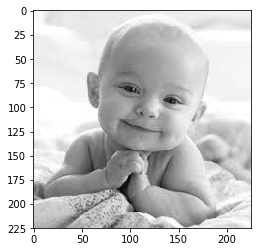

In [0]:
#plotting the image
plt.imshow(gray_img, cmap='gray')


In [0]:
from google.colab import files

uploaded = files.upload()

Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml


In [0]:
#cv::CascadeClassifier::load to load a .xml classifier file. It can be either a Haar or a LBP classifer
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [0]:
#cv::CascadeClassifier::detectMultiScale to perform the detection
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

In [0]:
print('Faces found: ', len(faces))

Faces found:  1


In [0]:
#here x,y,w,h stands for the coordinates x,y and width, height w,h, plotting rectangle for the face detected
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

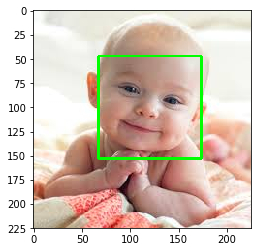

In [0]:
#showing the plotted image
plt.imshow(convertToRGB(test1))

In [0]:
#making a function to detect faces
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    #convert the test image to gray image as opencv face detector accepts gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)       
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);   
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img_copy

In [0]:
from google.colab import files

uploaded = files.upload()

Saving test3.jpg to test3.jpg


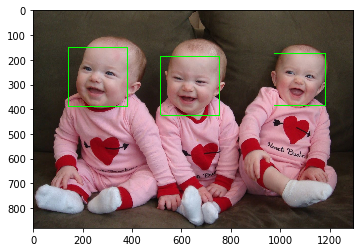

In [0]:
test2 = cv2.imread('test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
from google.colab import files

uploaded = files.upload()

Saving test4.jpg to test4.jpg


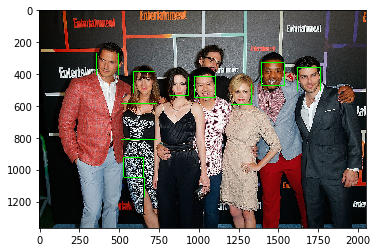

In [0]:
test2 = cv2.imread('test4.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))
#here we can see that the detected images are not appropriate since the scale factor is varying for each image 

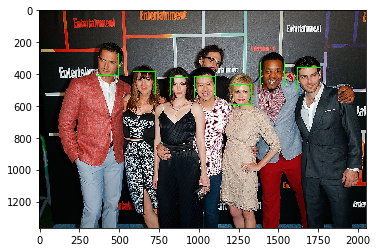

In [0]:
test2 = cv2.imread('test4.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2,scaleFactor=1.2) #setting the scale factor
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))
#here the faces detected are appropriate as compared to previous one

In [0]:
from google.colab import files # uploading different classifier

uploaded = files.upload()

Saving lbpcascade_frontalface.xml to lbpcascade_frontalface.xml


In [0]:
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')  

In [0]:
from google.colab import files

uploaded = files.upload()

Saving test2.jpg to test2.jpg


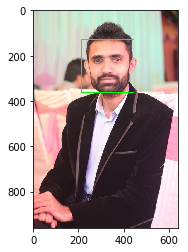

In [0]:
test2 = cv2.imread('test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2) #just changing the classifier in the function argument
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))


In [0]:
from google.colab import files

uploaded = files.upload()

Saving test5.jpg to test5.jpg


In [0]:
from google.colab import files

uploaded = files.upload()

Saving test6.jpg to test6.jpg


In [0]:
test1 = cv2.imread('test5.jpg')

test2 = cv2.imread('test6.jpg')


In [0]:
t1 = time.time() #calculating current time

haar_detected_img = detect_faces(haar_face_cascade, test1)

t2 = time.time() # calculating time after the face detection classifier has been applied
dt1 = t2 - t1 #finding time difference 
print(dt1)

0.733360767364502


In [0]:
t1 = time.time()
#call our function to detect faces
lbp_detected_img = detect_faces(lbp_face_cascade, test1)
#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
print(dt2)

0.15451669692993164


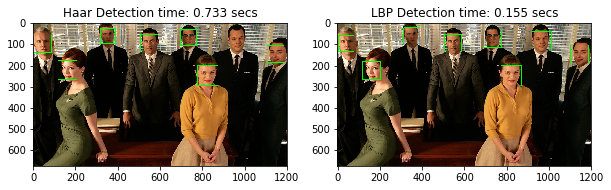

In [0]:
#plotting both both images to compare the accuracy and time for detected faces
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))
#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

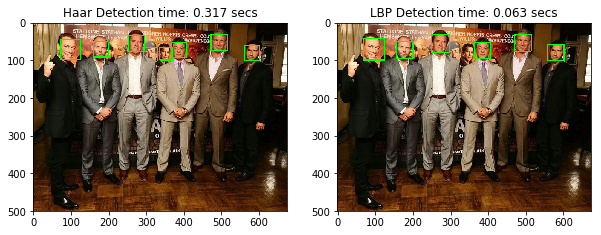

In [0]:
#haar detector
t1 = time.time()

haar_detected_img = detect_faces(haar_face_cascade, test2)

t2 = time.time()

dt1 = t2 - t1


#LBP detector
t1 = time.time()
lbp_detected_img = detect_faces(lbp_face_cascade, test2)

t2 = time.time()

dt2 = t2 - t1


#plting the results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))


In [0]:
#from above we can conclude that Haar Classifier has more accuracy than LBP but detection time for HAAR is more than that of LBP